In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('data_preprocessed.csv')

In [57]:
df

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,is_holiday,approval_flg,bundle_flg,region_size_numeric
0,422206773,58.0,0.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,W,NaN,1,NaN,NaN,1,0,0,NaN,NaN
1,348648289,44.0,1.0,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,W,NaN,2,RUS,NaN,2,0,0,1.0,4.0
2,345496995,23.0,0.0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,W,NaN,6,NaN,NaN,4,0,1,0.0,1.0
3,182783192,34.0,1.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,8,NaN,NaN,4,0,1,NaN,1.0
4,138498254,30.0,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,W,NaN,7,NaN,NaN,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,365712573,49.0,0.0,urban,0.0,1.0,0.0,0.0,1.0,3.0,...,W,NaN,2,NaN,NaN,2,0,0,NaN,2.0
18687,305526568,58.0,0.0,msk,0.0,0.0,0.0,0.0,0.0,0.0,...,W,NaN,6,NaN,NaN,4,0,0,NaN,3.0
18688,77876991,47.0,1.0,urban,0.0,1.0,1.0,1.0,1.0,1.0,...,M,NaN,4,NaN,NaN,4,0,0,1.0,2.0
18689,321508947,41.0,1.0,town,0.0,0.0,1.0,0.0,1.0,1.0,...,W,NaN,0,NaN,NaN,3,0,0,NaN,1.0


In [58]:
fig = sp.make_subplots(rows=2, cols=1,
                        subplot_titles=("Boxplots by Gender", "Age Distribution"),
                        vertical_spacing=0.1)

# Первый график: боксплоты
fig.add_trace(go.Box(x=df[df['gender_cd'] == 0]['age'], name='Женщины', boxmean='sd'),
              row=1, col=1)

fig.add_trace(go.Box(x=df[df['gender_cd'] == 1]['age'], name='Мужчины', boxmean='sd'),
              row=1, col=1)

# Второй график: гистограмма
fig.add_trace(go.Histogram(x=df['age'], name='Age Distribution', opacity=0.75),
              row=2, col=1)

# Настройка осей и заголовков
fig.update_layout(title_text='Age Analysis by Gender',
                  height=600,  # Высота всего графика
                  showlegend=True)

fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_yaxes(title_text='Age', row=2, col=1)

# Отображение графика
fig.show()

In [59]:
df.dtypes

customer_id                     int64
age                           float64
gender_cd                     float64
region_size                    object
foreign_flg                   float64
entrepreneur_flg              float64
auto_flg                      float64
traveler_flg                  float64
partnership_flg               float64
child_amt                     float64
realty_type                    object
segment_cd                     object
bundle_nm                      object
confirmed_income              float64
predicted_income              float64
product_cd                     object
functional_cd                  object
finish_dttm                    object
state_talk_time_sec           float64
wo_hit_status_result_desc      object
wo_hit_status_reason_desc      object
employee_id                   float64
emp_age                         int64
emp_gender_cd                  object
emp_children_cnt              float64
emp_work_months_cnt             int64
emp_citizens

In [60]:
df['finish_dttm'] = pd.to_datetime(df['finish_dttm']).dt.strftime('%Y-%m')
df['finish_dttm'] = pd.to_datetime(df['finish_dttm'])

In [61]:
line_df = df.groupby('finish_dttm')['approval_flg'].mean().reset_index()
line_df

,finish_dttm,approval_flg
0,2022-01-01,0.172881
1,2022-02-01,0.130719
2,2022-03-01,0.300813
3,2022-04-01,0.262857
4,2022-05-01,0.245283
5,2022-06-01,0.158333
6,2022-07-01,0.176638
7,2022-08-01,0.129108
8,2022-09-01,0.200514
9,2022-10-01,0.222222


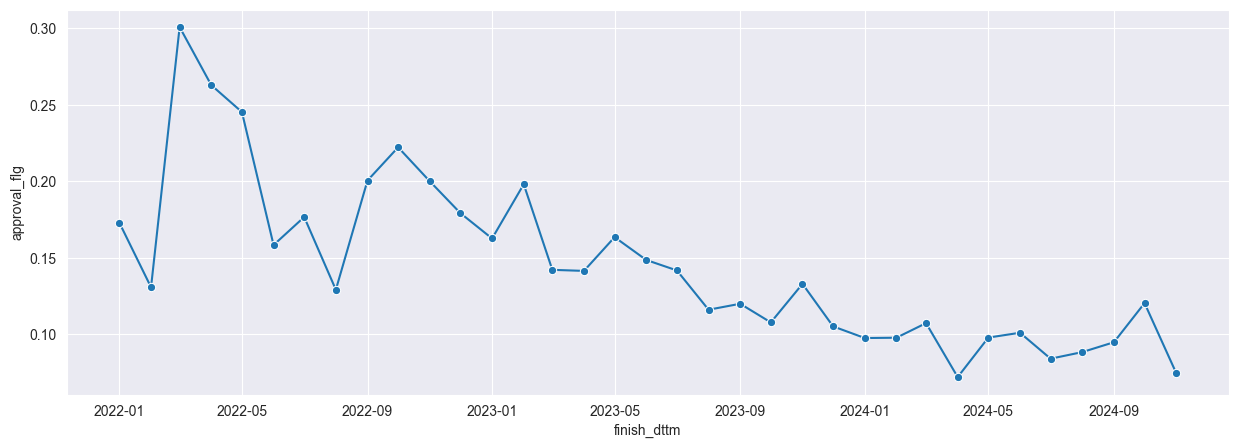

In [62]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=line_df, x='finish_dttm', y='approval_flg', marker='o')
plt.show()
